In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import math
from textblob import TextBlob

base_plot_save='./plots/'

In [2]:
supercorpus = './data_1/supercorpus_V4.csv'
BEL= './data_1/parliament speeches/ParlEE_BE_plenary_speeches.csv'
DE= './data_1/parliament speeches/ParlEE_DE_plenary_speeches.csv'
FR= './data_1/parliament speeches/ParlEE_FR_plenary_speeches.csv'
HU= './data_1/parliament speeches/ParlEE_HU_plenary_speeches.csv'
UK= './data_1/parliament speeches/ParlEE_UK_plenary_speeches.csv'
PT= './data_1/parliament speeches/ParlEE_PT_plenary_speeches.csv'
AT= './data_1/parliament speeches/ParlEE_AT_plenary_speeches.csv'
IE= './data_1/parliament speeches/ParlEE_IE_plenary_speeches.csv'

In [3]:
df = pd.read_csv(supercorpus)
de_df = pd.read_csv(DE)
fr_df = pd.read_csv(FR)
hu_df = pd.read_csv(HU)
uk_df = pd.read_csv(UK)
pt_df = pd.read_csv(PT)
at_df = pd.read_csv(AT)
ie_df = pd.read_csv(IE)
bel_df = pd.read_csv(BEL)

/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1771311090.py:2: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  de_df = pd.read_csv(DE)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1771311090.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(FR)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1771311090.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_df = pd.read_csv(UK)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1771311090.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  at_df = pd.read_csv(AT)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1771311090.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or s

In [165]:
datasets = [de_df, fr_df, hu_df, uk_df, pt_df, at_df, ie_df, bel_df]
datasets_reduced = [fr_df, hu_df, uk_df]

# Preprocessing

In [5]:
#ADD YEAR COLUMN TO THE DATAFRAME FOR EASIER ACCESS TO THE INFO
de_df['year'] = pd.to_datetime(de_df['date'], format='%d/%m/%Y').dt.year
fr_df['year'] = pd.to_datetime(fr_df['date'], format='%d/%m/%Y').dt.year
hu_df['year'] = pd.to_datetime(hu_df['date'], format='%d/%m/%Y').dt.year
uk_df['year'] = pd.to_datetime(uk_df['date'], format='%d/%m/%Y').dt.year
pt_df['year'] = pd.to_datetime(pt_df['date'], format='%d/%m/%Y').dt.year
at_df['year'] = pd.to_datetime(at_df['date'], format='%d/%m/%Y').dt.year
ie_df['year'] = pd.to_datetime(ie_df['date'], format='%d/%m/%Y').dt.year
bel_df['year'] = pd.to_datetime(bel_df['date'], format='%d/%m/%Y').dt.year

In [6]:
at_df['iso3country'] = 'AUS'
de_df['iso3country'] = 'GER'

## Dataset Exploration: amount of data available

In [10]:
bel_df.iloc[900]['text']

'Elles ont abouti à une nouvelle proposition de convention collective que les organisations syndicales souhaitent soumettre à leur base.'

each row is just a phrase in a discussion about the topic in 'agenda'. check them out since some of them talk about migration

In [13]:
#FRANCE
fr_df['year'].value_counts()

year
2018    581141
2013    565452
2019    517332
2009    470648
2015    426832
2014    417424
2010    394787
2011    373007
2016    354967
2017    286439
2012    284447
Name: count, dtype: int64

In [14]:
#HUNGARY
hu_df['year'].value_counts()

year
2015    237305
2016    222168
2011    189210
2017    186960
2009    173481
2019    148804
2018    147246
2012    135340
2013    133112
2010    131431
2014     64250
Name: count, dtype: int64

In [15]:
#UNITED KINGDOM
uk_df['year'].value_counts()

year
2018    709182
2016    667512
2013    636677
2011    634054
2019    629548
2014    598344
2010    587362
2012    579069
2009    576419
2015    575861
2017    572998
Name: count, dtype: int64

In [18]:
at_df['iso3country'].value_counts()

#i want to modify the iso3country column to AUS for all the rows
at_df['iso3country'] = 'AUS'

at_df['iso3country'].value_counts()

iso3country
AUS    1526362
Name: count, dtype: int64

## Extracting relevant data

Building all the functions to:
- filter the datasets in order to keep only the relevant speeches (namely the ones regarding migration)
- compute sentiment analysis for every datapoint in these datasets

In [20]:
def filter_dataframe_by_words(df, words):
    # Combine all words into a single regex pattern (joined by "|")
    pattern = '|'.join(words)
    
    # Filter the DataFrame for rows where 'Text' contains any of the words
    matching_df = df[df['text'].str.contains(pattern, case=False, na=False)]
    #print(matching_df.index.tolist())
    # Return the filtered DataFrame
    return matching_df

In [248]:


def sentiment_analysis(df):
    # Create a new column 'Sentiment' with the sentiment of each speech
    df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    #df = df[df['Sentiment'] > treshold]
    return df


In [177]:
dataset_languages = {
    #'de_df': 'German',
    'fr_df': 'French',
    'hu_df': 'Hungarian',
    'uk_df': 'English',
    #'pt_df': 'Portuguese',
    #'at_df': 'German',
    #'ie_df': 'English',  # Assuming English for simplicity; add Irish if needed
    #'be_df': 'Dutch'  # Belgium added with Dutch as one of the languages
}

# Language-specific migration words dictionary
# Expanded Language-specific migration and nationalist rhetoric words dictionary
migration_words = {
    'English': [
        'migration', 'immigration', 'emigration', 'refuge', 'asylum', 'refugee', 
        'immigrant', 'migrant', 'expat', 'diaspora', 'border', 'borderline', 
        'integration', 'inclusion', 'exclusion', 'assimilation', 
        'naturalization', 'citizenship', 'national', 'nationalism', 
        'patriotism', 'sovereignty', 'identity', 'cultural identity', 
        'ethnic identity', 'minority', 'majority', 'foreign', 'foreigner', 
        'expulsion', 'deportation', 'xenophobia', 'nativism', 'hegemony', 
        'ethnic', 'threat', 'protectionism', 'homogeneity', 'diversity', 
        'pluralism', 'multiculturalism', 'ethnic cleansing', 'territory', 
        'nation-state', 'statehood', 'self-determination', 'autonomy', 
        'isolationism', 'patriot', 'homeland', 'heritage', 'roots', 'tradition', 
        'sovereign borders', 'ethnic purity', 'ethnic composition'
    ],
    'French': [
        'migration', 'immigration', 'émigration', 'réfugié', 'asile', 
        'immigrant', 'migrant', 'expatrié', 'diaspora', 'frontière', 
        'intégration', 'inclusion', 'exclusion', 'assimilation', 
        'naturalisation', 'citoyenneté', 'national', 'nationalisme', 
        'patriotisme', 'souveraineté', 'identité', 'identité culturelle', 
        'identité ethnique', 'minorité', 'majorité', 'étranger', 
        'étrangère', 'expulsion', 'déportation', 'xénophobie', 'nativisme', 
        'hégémonie', 'ethnique', 'menace', 'protectionnisme', 'homogénéité', 
        'diversité', 'pluralisme', 'multiculturalisme', 'nettoyage ethnique', 
        'territoire', 'État-nation', 'souveraineté', 'autodétermination', 
        'autonomie', 'isolationnisme', 'patriote', 'patrie', 'héritage', 
        'racines', 'tradition', 'frontières souveraines', 'pureté ethnique', 
        'composition ethnique'
    ],
    # 'German': [
    #     'Migration', 'Immigration', 'Emigration', 'Flüchtling', 'Asyl', 
    #     'Einwanderer', 'Migrant', 'Expats', 'Diaspora', 'Grenze', 
    #     'Integration', 'Inklusion', 'Exklusion', 'Assimilation', 
    #     'Einbürgerung', 'Staatsbürgerschaft', 'national', 'Nationalismus', 
    #     'Patriotismus', 'Souveränität', 'Identität', 'kulturelle Identität', 
    #     'ethnische Identität', 'Minderheit', 'Mehrheit', 'Ausländer', 
    #     'ausländisch', 'Abschiebung', 'Deportation', 'Fremdenfeindlichkeit', 
    #     'Nativismus', 'Hegemonie', 'ethnisch', 'Bedrohung', 'Schutzismus', 
    #     'Homogenität', 'Vielfalt', 'Pluralismus', 'Multikulturalismus', 
    #     'ethnische Säuberung', 'Territorium', 'Nationalstaat', 'Eigenstaatlichkeit', 
    #     'Selbstbestimmung', 'Autonomie', 'Isolationismus', 'Patriot', 'Heimat', 
    #     'Erbe', 'Wurzeln', 'Tradition', 'souveräne Grenzen', 'ethnische Reinheit', 
    #     'ethnische Zusammensetzung'
    # ],
    # 'Portuguese': [
    #     'migração', 'imigração', 'emigração', 'refugiado', 'asilo', 
    #     'imigrante', 'migrante', 'expatriado', 'diáspora', 'fronteira', 
    #     'integração', 'inclusão', 'exclusão', 'assimilação', 
    #     'naturalização', 'cidadania', 'nacional', 'nacionalismo', 
    #     'patriotismo', 'soberania', 'identidade', 'identidade cultural', 
    #     'identidade étnica', 'minoria', 'maioria', 'estrangeiro', 
    #     'expulsão', 'deportação', 'xenofobia', 'nativismo', 'hegemonia', 
    #     'étnico', 'ameaça', 'protecionismo', 'homogeneidade', 'diversidade', 
    #     'pluralismo', 'multiculturalismo', 'limpeza étnica', 'território', 
    #     'Estado-nação', 'autodeterminação', 'autonomia', 'isolacionismo', 
    #     'patriota', 'pátria', 'herança', 'raízes', 'tradição', 
    #     'fronteiras soberanas', 'pureza étnica', 'composição étnica'
    # ],
    'Hungarian': [
        'migráció', 'bevándorlás', 'kivándorlás', 'menekült', 'menedék', 
        'bevándorló', 'migráns', 'expat', 'diaszpóra', 'határ', 
        'integráció', 'befogadás', 'kizárás', 'asszimiláció', 
        'honosítás', 'állampolgárság', 'nemzeti', 'nacionalizmus', 
        'patriotizmus', 'szuverenitás', 'identitás', 'kulturális identitás', 
        'etnikai identitás', 'kisebbség', 'többség', 'külföldi', 'idegen', 
        'kiutasítás', 'kitoloncolás', 'idegengyűlölet', 'nativizmus', 
        'hegemónia', 'etnikai', 'fenyegetés', 'protekcionizmus', 
        'homogenitás', 'sokszínűség', 'pluralizmus', 'multikulturalizmus', 
        'etnikai tisztogatás', 'terület', 'nemzetállam', 'önállóság', 
        'autonómia', 'elszigetelődés', 'hazafi', 'haza', 'örökség', 
        'gyökerek', 'hagyomány', 'szuverén határok', 'etnikai tisztaság', 
        'etnikai összetétel'
    ],
    # 'Dutch': [
    #     'migratie', 'immigratie', 'emigratie', 'toevlucht', 'asiel', 
    #     'immigrant', 'migrant', 'expat', 'diaspora', 'grens', 
    #     'integratie', 'inclusie', 'uitsluiting', 'assimilatie', 
    #     'naturalisatie', 'burgerschap', 'nationaal', 'nationalisme', 
    #     'patriottisme', 'soevereiniteit', 'identiteit', 'culturele identiteit', 
    #     'etnische identiteit', 'minderheid', 'meerderheid', 'buitenlander', 
    #     'uitzetting', 'deportatie', 'xenofobie', 'nativisme', 'hegemonie', 
    #     'etnisch', 'dreiging', 'protectionisme', 'homogeniteit', 'diversiteit', 
    #     'pluralisme', 'multiculturalisme', 'etnische zuivering', 'territorium', 
    #     'natiestaat', 'zelfbeschikking', 'autonomie', 'isolationisme', 
    #     'patriot', 'thuisland', 'erfgoed', 'wortels', 'traditie', 
    #     'soevereine grenzen', 'etnische zuiverheid', 'etnische samenstelling'
    # ]
}

#migration_words['Belgium'] = list(set(migration_words['Dutch'] + migration_words['French']))


In [180]:
# Initialize filtered datasets list
filtered_datasets = []

# Iterate through datasets and filter them using the appropriate words
for dataset_name, dataset in zip(dataset_languages.keys(), datasets_reduced):
    # Get the language for the current dataset
    language = dataset_languages[dataset_name]
    
    # Get the relevant words for this language
    words_to_use = migration_words[language]
    
    # Filter the dataset (assuming filter_dataframe_by_words is a defined function)
    filtered_datasets.append(filter_dataframe_by_words(dataset, words_to_use))

In [181]:
# i want to apply the sentiment_analysis function to all the filtered datasets

sentiment_datasets = []

for dataset in filtered_datasets:
    sentiment_datasets.append(sentiment_analysis(dataset))

migration_df = pd.concat(sentiment_datasets)

migration_df = migration_df.rename(columns={'iso3country': 'nation'})
migration_df

/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1615729152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1615729152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/1615729152.py:5: SettingWithCopyWarni

,instance_id,date,agenda,speechnumber,paragraphnumber,sentencenumber,text,parliament,nation,eu,policyarea,speaker,party,cmp_party,year,Sentiment,chair
19,310,06/01/2009,Questions orales sans débat,35,1.0,1,"La parole est à M. Hubert Falco, secrétaire d’...",FR-Assemblee-Nationale,FRA,0,20,le président,NaN,NaN,2009,0.000000,NaN
22,352,06/01/2009,Questions orales sans débat,41,1.0,1,"La parole est à M. Hubert Falco, secrétaire d’...",FR-Assemblee-Nationale,FRA,0,20,le président,NaN,NaN,2009,0.000000,NaN
25,389,06/01/2009,Questions orales sans débat,47,1.0,1,"La parole est à M. Hubert Falco, secrétaire d’...",FR-Assemblee-Nationale,FRA,0,20,le président,NaN,NaN,2009,0.000000,NaN
28,424,06/01/2009,Questions orales sans débat,53,1.0,1,"La parole est à M. Hubert Falco, secrétaire d’...",FR-Assemblee-Nationale,FRA,0,20,le président,NaN,NaN,2009,0.000000,NaN
30,446,06/01/2009,Questions orales sans débat,57,1.0,1,"La parole est à M. Hubert Falco, secrétaire d’...",FR-Assemblee-Nationale,FRA,0,20,le président,NaN,NaN,2009,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766861,6766981,19/12/2019,Electoral Practices,157,NaN,8,"With his actions, he rightly seeks to support ...",UK-HouseOfCommons,GBR,0,20,Chloe Smith,Con,51620.0,2019,0.285714,NaN
6766914,6767034,19/12/2019,Electoral Practices,159,NaN,12,Our evaluations also show that the huge majori...,UK-HouseOfCommons,GBR,0,2,Chloe Smith,Con,51620.0,2019,0.342857,NaN
6766918,6767038,19/12/2019,Electoral Practices,159,NaN,16,I reassure the House that that voter ID is bac...,UK-HouseOfCommons,GBR,0,2,Chloe Smith,Con,51620.0,2019,0.000000,NaN
6766971,6767091,19/12/2019,Electoral Practices,161,NaN,40,"Regular meetings take place between myself, as...",UK-HouseOfCommons,GBR,0,12,Chloe Smith,Con,51620.0,2019,0.000000,NaN


# Plots
Given the preprocessing steps which allowed me to build the final_df dataset
I want to do the following plots:
- amount of datapoints for each year for each country


In [53]:
def plot_number_datapoints(df, topic):
    # Group by 'nation' and 'year', and count occurrences
    grouped = df.groupby(['nation', 'year']).size().reset_index(name='datapoints')

    # Pivot the table to have 'year' as columns and 'nation' as rows
    pivot_table = grouped.pivot(index='year', columns='nation', values='datapoints')

    # Plot
    plt.figure(figsize=(12, 8))
    for nation in pivot_table.columns:
        plt.plot(pivot_table.index, pivot_table[nation], label=nation, linewidth=4 )

    # Customize the plot
    plt.title(f"Number of Datapoints Per Year for Each Nation - {topic}", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Number of Datapoints", fontsize=14)
    plt.legend(title="Nation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig(base_plot_save + 'topic' + 'datapoints_per_year.png')
    plt.show()

In [56]:
def plot_average_sentiment_nation(df, topic):
    # Group by 'nation' and 'year', calculate the mean sentiment
    sentiment_avg = migration_df.groupby(['nation', 'year'])['Sentiment'].mean().reset_index()

    # Pivot for plotting
    pivot_sentiment = sentiment_avg.pivot(index='year', columns='nation', values='Sentiment')

    # Plot
    plt.figure(figsize=(12, 8))
    for nation in pivot_sentiment.columns:
        plt.plot(pivot_sentiment.index, pivot_sentiment[nation], label=nation, linewidth=2)

    # Customize the plot
    plt.title("Average Sentiment Per Year by Nation", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Average Sentiment", fontsize=14)
    plt.legend(title="Nation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig(base_plot_save + 'average_sentiment_per_year.png')
    plt.show()

In [58]:
def plot_sentiment_heatmap(df, topic):
    # Group by 'nation' and 'year', calculate the mean sentiment
    heatmap_data = migration_df.groupby(['nation', 'year'])['Sentiment'].mean().unstack()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Sentiment Heatmap: Nation vs. Year", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Nation", fontsize=14)
    plt.tight_layout()

    # Save the plot
    plt.savefig(base_plot_save + 'sentiment_heatmap.png')
    plt.show()

In [289]:
def plot_sentiment_by_party_3_rows(df):
  """
  Plot the average sentiment for each party over time across three nations.

  Parameters:
    df (pd.DataFrame): DataFrame with the columns 'nation', 'party', 'year', and 'Sentiment'.
  """
  nations = df['nation'].unique()
  assert len(nations) == 3, "This function is designed for exactly three nations."

  # Adjust the subplot layout for three rows and one column
  fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

  # Loop through nations and create plots in subplots
  for i, nation in enumerate(nations):
    ax = axes[i]
    nation_data = df[df['nation'] == nation]

    # Ensure 'year' is numeric and calculate average sentiment by party and year
    nation_data['year'] = pd.to_numeric(nation_data['year'], errors='coerce')
    grouped = (
        nation_data.groupby(['party', 'year'])['Sentiment']
        .mean()
        .reset_index()
    )

    # Create line plots for each party within the subplot
    parties = grouped['party'].unique()
    for party in parties:
      party_data = grouped[grouped['party'] == party]
      ax.plot(party_data['year'], party_data['Sentiment'], label=party, marker='o')

    # Add labels and title
    ax.set_title(f"{nation} - Sentiment by Party", fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Average Sentiment", fontsize=10)
    ax.grid(True)
    ax.legend(title="Party", loc='upper left', fontsize=8)

  plt.tight_layout()
  plt.savefig(base_plot_save + 'sentiment_by_party_3_rows.png')
  plt.show()

In [283]:
def plot_datapoints_by_party_and_year_3_rows(df):
  """
  Plot the number of datapoints for each party over time across three nations.

  Parameters:
    df (pd.DataFrame): DataFrame with the columns 'nation', 'party', 'year', and 'Sentiment'.
  """
  nations = df['nation'].unique()
  assert len(nations) == 3, "This function is designed for exactly three nations."

  # Adjust the subplot layout for three rows and one column
  fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

  # Loop through nations and create plots in subplots
  for i, nation in enumerate(nations):
    ax = axes[i]
    nation_data = df[df['nation'] == nation]

    # Group by party and year, count datapoints
    grouped = (
        nation_data.groupby(['party', 'year'])['Sentiment']
        .size()
        .to_frame(name='datapoint_count')
        .reset_index()
    )

    # Create line plots for each party within the subplot
    parties = grouped['party'].unique()
    for party in parties:
      party_data = grouped[grouped['party'] == party]
      ax.plot(party_data['year'], party_data['datapoint_count'], label=party, marker='o')

    # Add labels and title
    ax.set_title(f"{nation} - Datapoints by Party over Time", fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Number of Datapoints", fontsize=10)
    ax.grid(True)
    ax.legend(title="Party", loc="upper left", fontsize=8)

  plt.tight_layout()
  plt.savefig(base_plot_save + 'datapoints_by_party_and_year_3_rows.png')
  plt.show()

In [285]:
def plot_sentiment_and_datapoints_3_rows(df):
    """
    Create subplots showing both the sentiment analysis score and the
    amount of datapoints for each party over the years for three nations.
    Each party is assigned the same color for both the line plot and the bar plot.

    Parameters:
    df (pd.DataFrame): DataFrame with the columns 'nation', 'party', 'year', 'Sentiment'.
    """
    # Ensure the 'year' column is sorted and 'Sentiment' is numeric
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df = df.dropna(subset=['year', 'Sentiment'])

    nations = df['nation'].unique()
    assert len(nations) == 3, "This function is designed for exactly three nations."

    # Adjust the subplot layout for three rows and one column
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

    # Loop through nations and create individual plots
    for i, nation in enumerate(nations):
        ax = axes[i]
        nation_data = df[df['nation'] == nation]

        # Group by party and year to calculate both sentiment and datapoint count
        grouped = (
            nation_data.groupby(['party', 'year'])
            .agg(
                datapoint_count=('Sentiment', 'size'),
                avg_sentiment=('Sentiment', 'mean')
            )
            .reset_index()
        )

        # Get a color palette based on the number of unique parties
        parties = grouped['party'].unique()
        palette = sns.color_palette("Set1", len(parties))  # You can change the palette as needed
        color_map = {party: palette[i] for i, party in enumerate(parties)}

        # Plot the datapoint count (secondary y-axis)
        ax.set_ylabel('Datapoint Count', fontsize=12, color='tab:orange')
        ax.tick_params(axis='y', labelcolor='tab:orange')
        for party in parties:
            party_data = grouped[grouped['party'] == party]
            ax.bar(
                party_data['year'],
                party_data['datapoint_count'],
                alpha=0.3,
                label=f"{party} Count",
                color=color_map[party]
            )

        # Create a secondary y-axis for datapoint count
        ax2 = ax.twinx()
        # Plot the average sentiment (primary y-axis)
        ax2.set_title(f"{nation} - Sentiment vs Datapoints", fontsize=14)
        ax2.set_xlabel('Year', fontsize=12)
        ax2.set_ylabel('Average Sentiment', fontsize=12, color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        for party in parties:
            party_data = grouped[grouped['party'] == party]
            ax2.plot(
                party_data['year'],
                party_data['avg_sentiment'],
                label=f"{party} Sentiment",
                marker='o',
                color=color_map[party]
            )

        # Add legends
        ax.legend(loc='upper left', fontsize=8)
        ax2.legend(loc='upper right', fontsize=8)

    plt.tight_layout()
    plt.savefig(base_plot_save + 'sentiment_and_datapoints_3_rows.png')
    plt.show()

In [287]:
def plot_datapoints_times_sentiment_3_rows(df):
    """
    Create subplots showing the product of the number of datapoints and the average sentiment
    for each party in each year, for three nations in the dataset.

    Parameters:
    df (pd.DataFrame): DataFrame with the columns 'nation', 'party', 'year', 'Sentiment'.
    """
    # Ensure the 'year' column is numeric and 'Sentiment' is valid
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df = df.dropna(subset=['year', 'Sentiment'])

    nations = df['nation'].unique()
    assert len(nations) == 3, "This function is designed for exactly three nations."

    # Adjust the subplot layout for three rows and one column
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

    # Loop through nations and create plots in subplots
    for i, nation in enumerate(nations):
        ax = axes[i]
        nation_data = df[df['nation'] == nation]

        # Group by party and year to calculate metrics
        grouped = (
            nation_data.groupby(['party', 'year'])
            .agg(
                datapoint_count=('Sentiment', 'size'),
                avg_sentiment=('Sentiment', 'mean')
            )
            .reset_index()
        )

        # Calculate the product of datapoint count and average sentiment
        grouped['datapoints_times_sentiment'] = grouped['datapoint_count'] * grouped['avg_sentiment']

        parties = grouped['party'].unique()
        palette = sns.color_palette("Set1", len(parties))  # You can change the palette as needed
        color_map = {party: palette[i] for i, party in enumerate(parties)}

        # Plot for each party
        ax.set_title(f"{nation} - Datapoints × Sentiment by Party", fontsize=14)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Datapoints × Sentiment', fontsize=12)
        
        for party in parties:
            party_data = grouped[grouped['party'] == party]

            # Plot the product for the party
            ax.plot(
                party_data['year'],
                party_data['datapoints_times_sentiment'],
                label=party,
                marker='o',
                color=color_map[party]
            )

        ax.legend(loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.savefig(base_plot_save + 'datapoints_times_sentiment_3_rows.png')
    plt.show()

## PLOTTING RESULTS

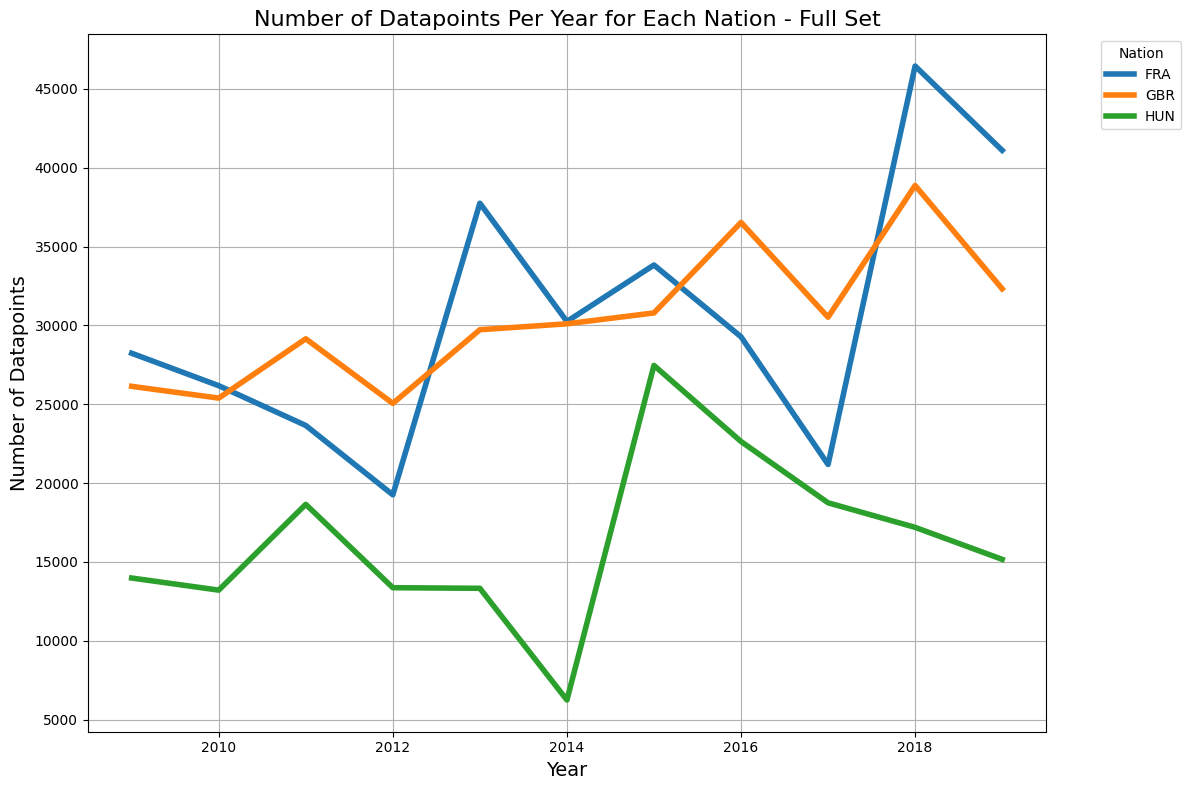

In [241]:
plot_number_datapoints(migration_df, 'Full Set')

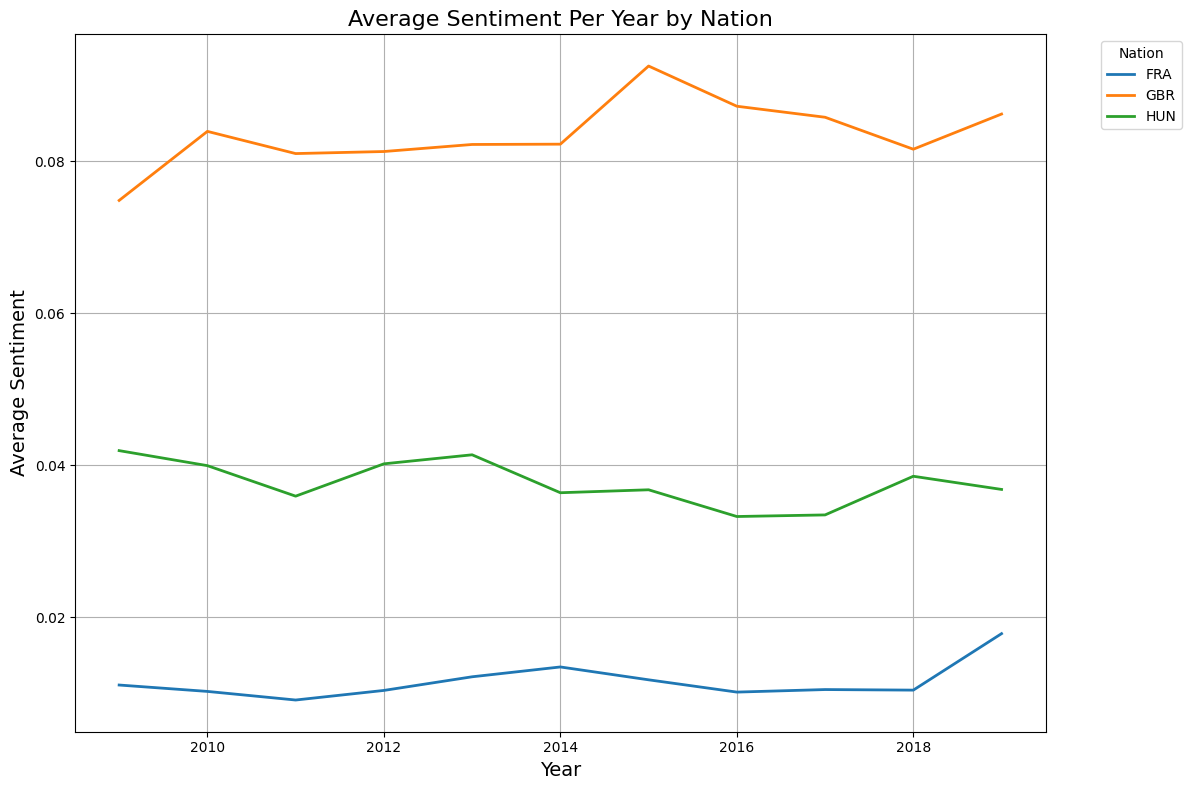

In [242]:
plot_average_sentiment_nation(migration_df, 'Migration')

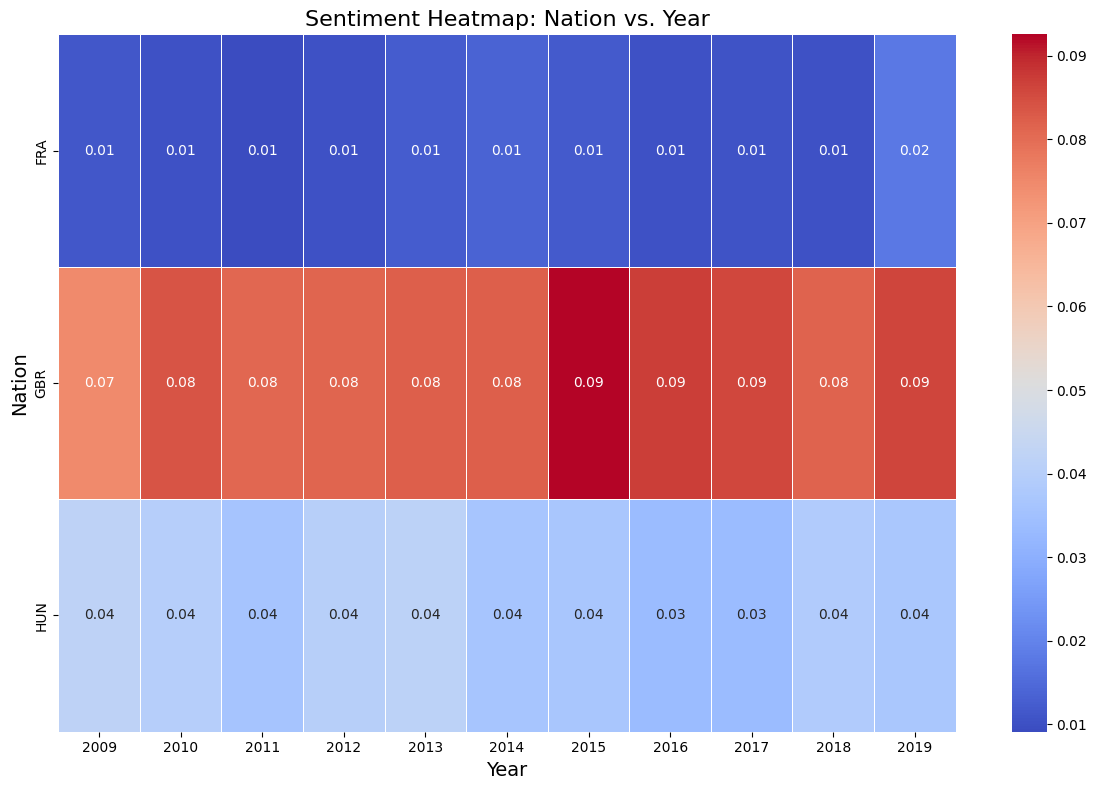

In [243]:
plot_sentiment_heatmap(migration_df, 'Migration')

/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/415420826.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nation_data['year'] = pd.to_numeric(nation_data['year'], errors='coerce')
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/415420826.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nation_data['year'] = pd.to_numeric(nation_data['year'], errors='coerce')
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_33846/415420826.py:20: SettingWithCopyWarning: 
A

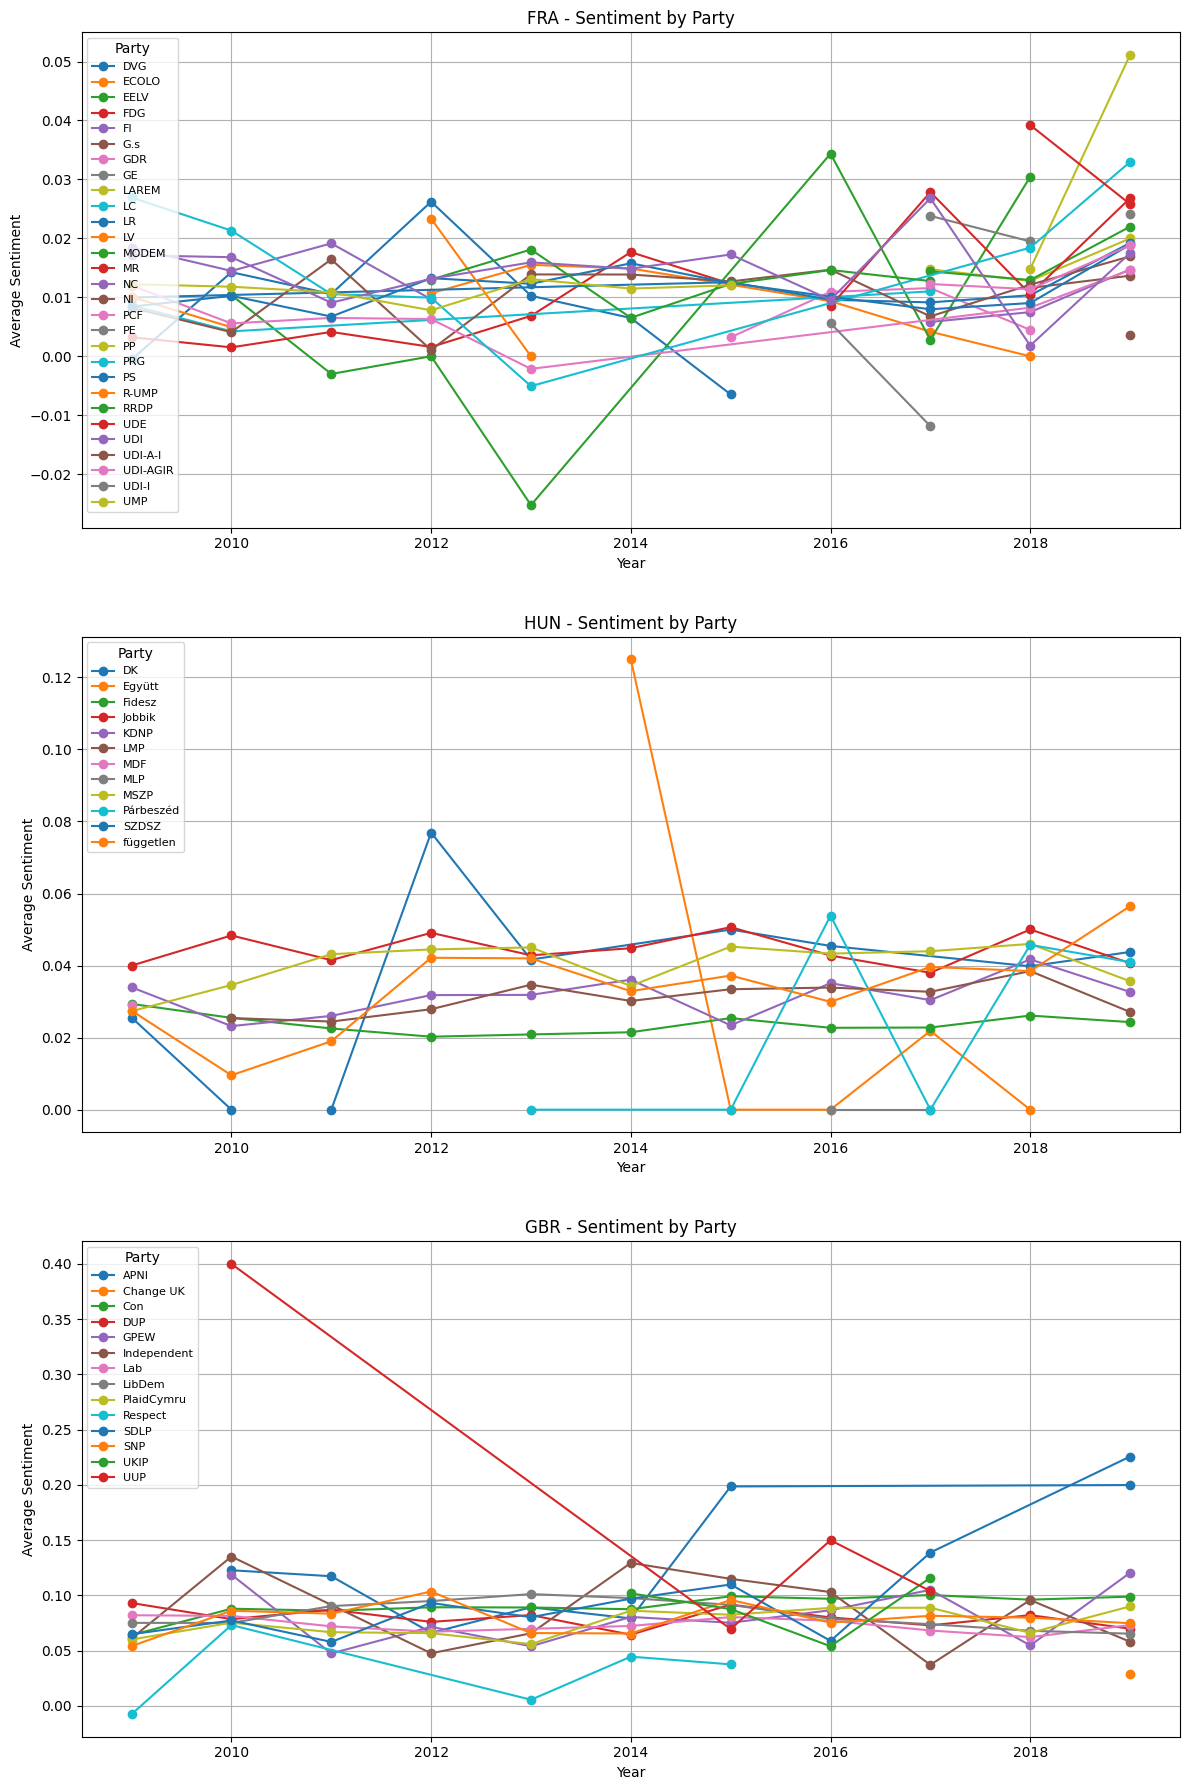

In [290]:
plot_sentiment_by_party_3_rows(migration_df)

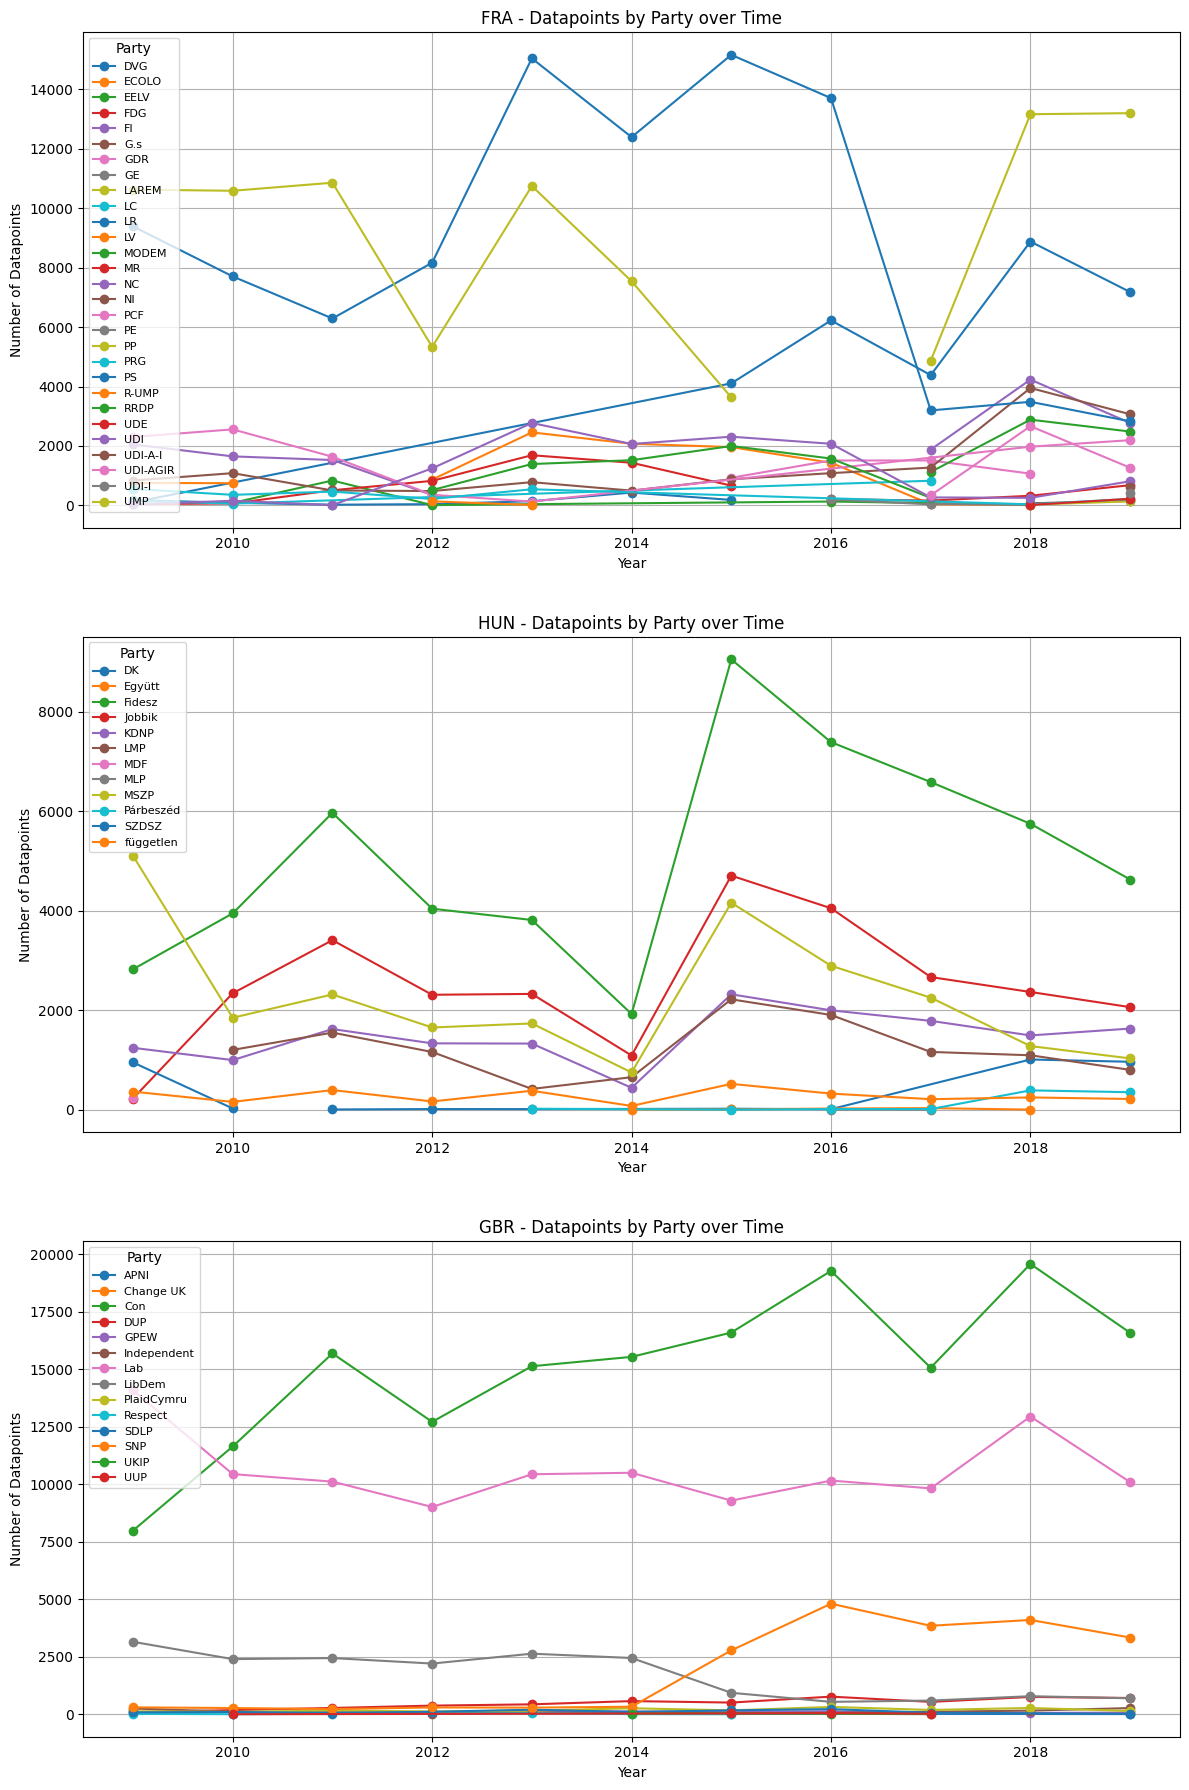

In [284]:
plot_datapoints_by_party_and_year_3_rows(migration_df)

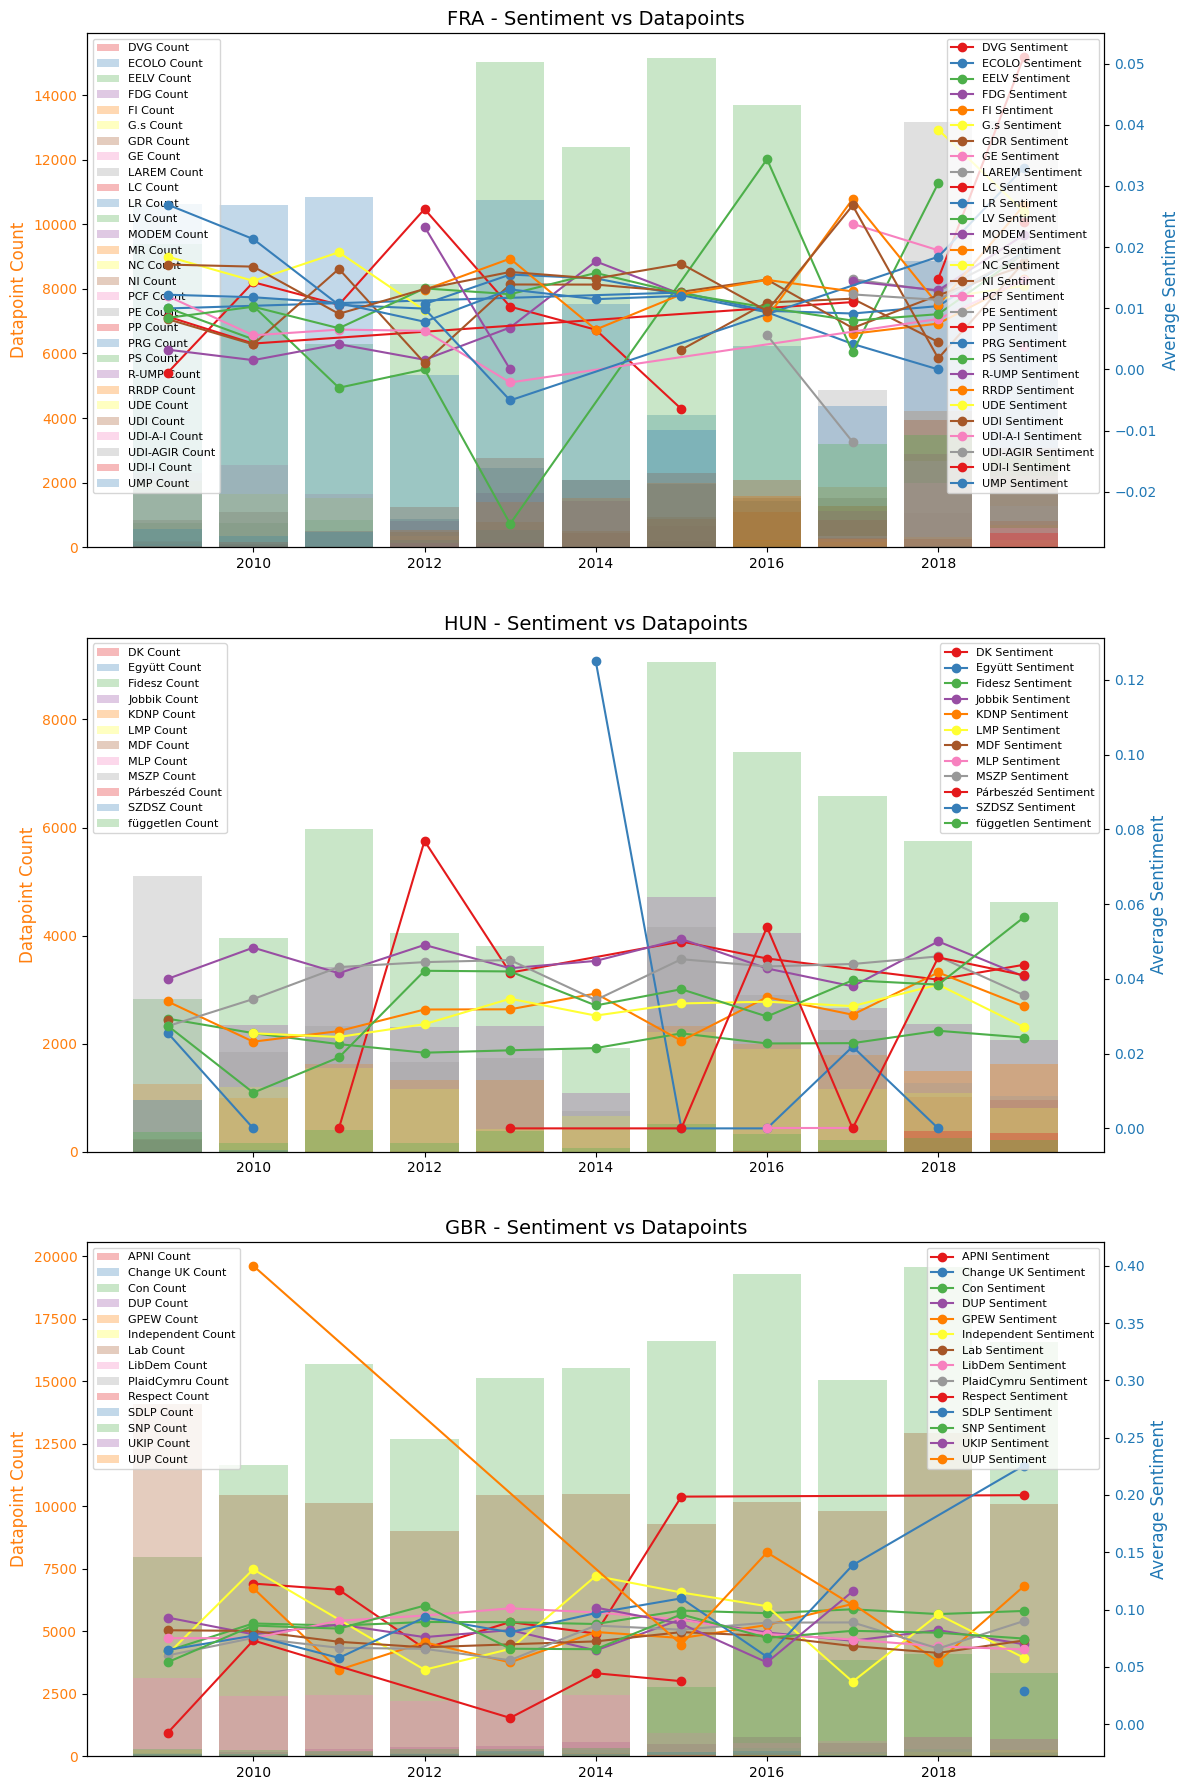

In [286]:
plot_sentiment_and_datapoints_3_rows(migration_df)

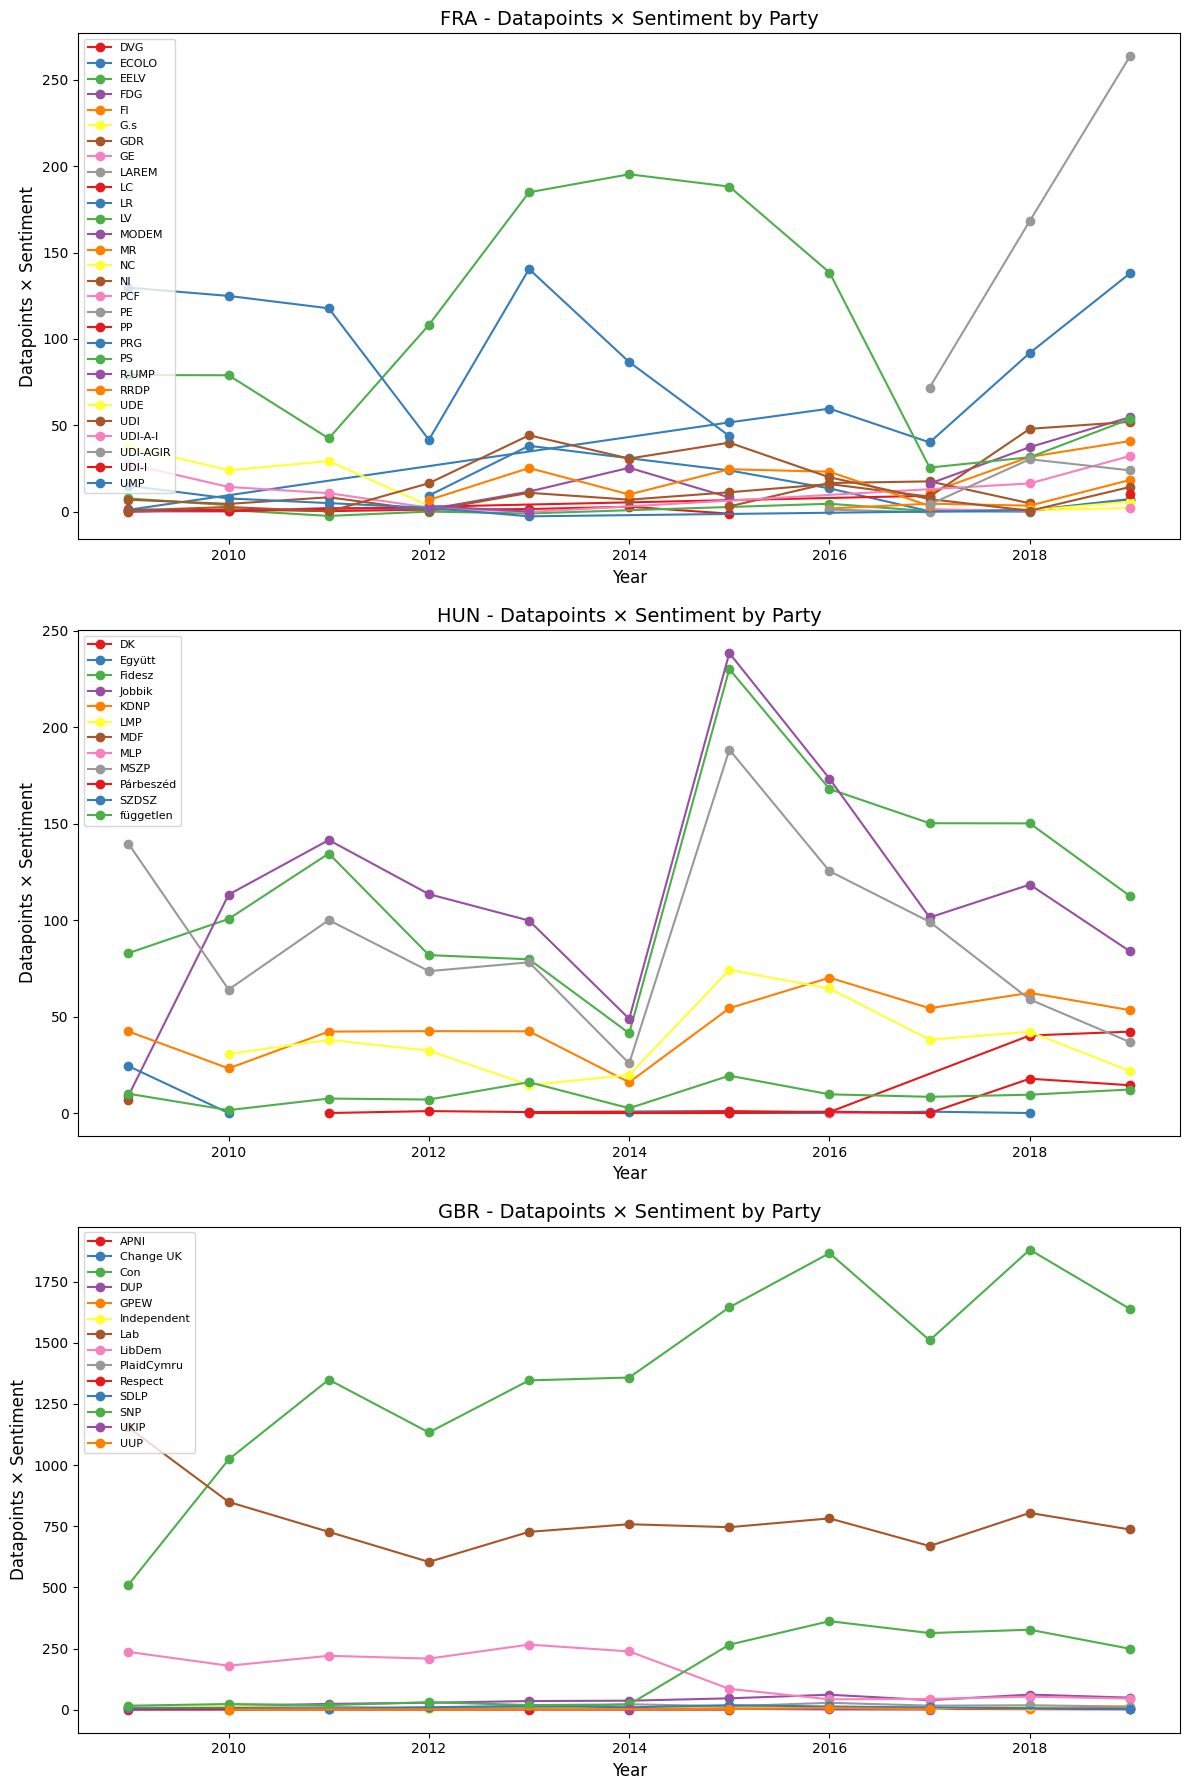

In [288]:
plot_datapoints_times_sentiment_3_rows(migration_df)